<a href="https://colab.research.google.com/github/rnlima8/Aula_do_dia_06out/blob/main/desafio_kaggle_4_moda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 4.0MB/s 
     |████████████████████████████████| 266kB 8.8MB/s 
     |████████████████████████████████| 148.9MB 74kB/s 
     |████████████████████████████████| 276kB 39.1MB/s 
     |████████████████████████████████| 1.8MB 39.9MB/s 
     |████████████████████████████████| 66.2MB 113kB/s 
     |████████████████████████████████| 6.8MB 26.0MB/s 
     |████████████████████████████████| 102kB 6.1MB/s 
     |████████████████████████████████| 174kB 39.8MB/s 
     |████████████████████████████████| 1.6MB 40.3MB/s 
     |████████████████████████████████| 13.9MB 332kB/s 
     |████████████████████████████████| 71kB 3.1MB/s 
     |████████████████████████████████| 604kB 42.8MB/s 
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 3.1MB 30.9MB/s 
     |████████████████████████████████| 2.1MB 32.8MB/s 
     |████████████████████████████████| 1.1MB 37.2MB/s 
 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from pycaret.classification import *

In [ ]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/train.csv'
df_churn_train = pd.read_csv(url)
df_churn_train

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,6684,Male,0,No,No,43.0,No,No phone service,DSL,No,No,Yes,Yes,No,Yes,One year,No,Electronic check,44.15,1931.3,0
5630,604,Male,0,No,No,NaN,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.2,0
5631,4803,Female,0,No,No,28.0,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),54.65,1517.5,0
5632,6317,Male,0,Yes,Yes,63.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1573.05,0


In [ ]:
df_churn_train_copy = df_churn_train.copy()

In [ ]:
#Normalizar as colunas
df_churn_train.columns = [col.lower() for col in df_churn_train.columns]
df_churn_train.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4030,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [ ]:
df_churn_train.dtypes


id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                 int64
dtype: object

In [ ]:
df_churn_train.isna().sum()

id                    0
gender                0
seniorcitizen         0
partner               0
dependents          218
tenure              461
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        99
monthlycharges        0
totalcharges          0
churn                 0
dtype: int64

In [ ]:
#dropando 'id
df_churn_train.drop(columns=['id'], inplace=True)
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [ ]:
coluna_treino = df_churn_train.columns
coluna_treino

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
df_churn_train.shape

(5634, 20)

In [ ]:
#vendo e contando os elementos de cada coluna
for i in coluna_treino:
    print(df_churn_train[i].value_counts())

Male      2849
Female    2785
Name: gender, dtype: int64
0    4740
1     894
Name: seniorcitizen, dtype: int64
No     2902
Yes    2732
Name: partner, dtype: int64
No     3793
Yes    1623
Name: dependents, dtype: int64
1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64
Yes    5082
No      552
Name: phoneservice, dtype: int64
No                  2692
Yes                 2390
No phone service     552
Name: multiplelines, dtype: int64
Fiber optic    2451
DSL            1959
No             1224
Name: internetservice, dtype: int64
No                     2763
Yes                    1647
No internet service    1224
Name: onlinesecurity, dtype: int64
No                     2488
Yes                    1922
No internet service    1224
Name: onlinebackup, dtype: int64
No                     2480
Yes                    1930
No internet service    1224
Name: deviceprotection, dtype

###tratando o paymentmethod

In [ ]:
#contar a variavel 
df_churn_train['paymentmethod'].value_counts()

Electronic check             1887
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
#preechendo os nan, criterio moda
df_churn_train['paymentmethod'].fillna('Electronic check', inplace=True)

In [ ]:
df_churn_train['paymentmethod'].value_counts()

Electronic check             1986
Mailed check                 1272
Bank transfer (automatic)    1212
Credit card (automatic)      1164
Name: paymentmethod, dtype: int64

In [ ]:
df_churn_train.shape

(5634, 20)

In [ ]:
#df_pay.fillna('Electronic check', inplace=True)

In [ ]:
'''
for h in l_index_pay:
    df_pay.drop(index = h, inplace = True)'''
 
    


In [ ]:
#df_churn_train[] = df_churn_train['totalcharges'].str.replace(',', '.')

###tratando o dependents


In [ ]:
df_churn_train['dependents'].isna().sum()

218

In [ ]:
#contar a variavel 
df_churn_train['dependents'].value_counts()

No     3793
Yes    1623
Name: dependents, dtype: int64

In [ ]:
#criterio = moda
df_churn_train['dependents'].fillna('No', inplace=True)

In [ ]:
df_churn_train['dependents'].isna().sum()

0

In [ ]:
df_churn_train['dependents'].value_counts()

No     4011
Yes    1623
Name: dependents, dtype: int64

###análise tenure

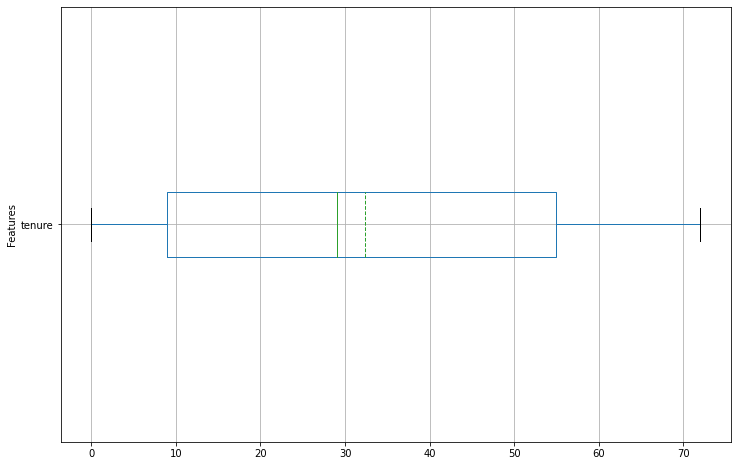

In [ ]:
#tenure não tem outliers 
df_churn_train[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [ ]:
#isna para serie e df
#no df é mais detalhada
df_churn_train[['tenure']].isna().sum()

tenure    461
dtype: int64

In [ ]:
df_churn_train['tenure'].value_counts()

1.0     438
72.0    259
2.0     166
3.0     149
4.0     132
       ... 
33.0     43
39.0     40
36.0     40
44.0     39
0.0       8
Name: tenure, Length: 73, dtype: int64

In [ ]:
df_churn_train[['tenure']].describe()

,tenure
count,5173.000000
mean,32.332882
std,24.463607
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
df_churn_train['tenure'].mean(), df_churn_train['tenure'].median(), df_churn_train['tenure'].mode()

(32.332882273342356, 29.0, 0    1.0
 dtype: float64)

In [ ]:
#29(53); 9 (81); 55(48), substutir por 27
#mp_q = (9*81+29*53+55*48)/(53+81+48)
#mp_q

26.956043956043956

In [ ]:
df_churn_train[df_churn_train['tenure']==55].count()

id                  48
gender              48
seniorcitizen       48
partner             48
dependents          46
tenure              48
phoneservice        48
multiplelines       48
internetservice     48
onlinesecurity      48
onlinebackup        48
deviceprotection    48
techsupport         48
streamingtv         48
streamingmovies     48
contract            48
paperlessbilling    48
paymentmethod       48
monthlycharges      48
totalcharges        48
churn               48
dtype: int64

In [ ]:
#substituição pela moda = 1.0
df_churn_train['tenure'].fillna(1.0, inplace = True)

In [ ]:
df_churn_train[df_churn_train['tenure'].isna()]

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn


In [ ]:
df_churn_train[['tenure']].describe()

,tenure
count,5634.000000
mean,29.769081
std,24.965201
min,0.000000
25%,5.000000
50%,24.500000
75%,53.000000
max,72.000000


In [ ]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

###totalcharges

In [ ]:
df_churn_train['totalcharges'] = df_churn_train['totalcharges'].str.replace(',', '.')
df_churn_train['totalcharges'] = pd.to_numeric(df_churn_train['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,No,No,56.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Electronic check,45.05,2560.10,0
1,Male,0,Yes,Yes,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,Female,0,Yes,No,60.0,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.70,0
3,Female,0,No,No,37.0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,Male,0,Yes,Yes,29.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.80,1


In [ ]:
df_churn_train['totalcharges'].value_counts()

20.20      8
19.55      7
19.75      6
19.45      6
19.65      6
          ..
1292.20    1
153.30     1
2659.45    1
2460.55    1
21.00      1
Name: totalcharges, Length: 5285, dtype: int64

In [ ]:
df_churn_train[['totalcharges']].isna().sum()

totalcharges    8
dtype: int64

In [ ]:
c = list(df_churn_train[df_churn_train['totalcharges'].isna()].index)
c

[161, 416, 1766, 2145, 3375, 3404, 4008, 5151]

In [ ]:
df_churn_train['tenure'][161]

0.0

In [ ]:
df_churn_train['totalcharges'].mode(), df_churn_train['totalcharges'].mean(), df_churn_train['totalcharges'].median()

(0    20.2
 dtype: float64, 2273.513810878064, 1396.125)

In [ ]:
#df_churn_train['monthlycharges'][161] SUBT PELA MODA
for i in c:
    df_churn_train['totalcharges'][i] = 20.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_churn_train['totalcharges'][5151]

20.2

###tratando as categoricas

In [ ]:
df_churn_train.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_train.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_train.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)
#df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_train.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_train.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_train.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_train.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_train.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_train.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_train.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 



In [ ]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,0,No,56.0,0,3,2,1,1,1,1,0,0,0,0,1,45.05,2560.10,0
1,0,0,1,Yes,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,1,0,1,No,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,1,0,0,No,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,0,0,1,Yes,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [ ]:
df_churn_train.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,0,0,56.0,0,3,2,1,1,1,1,0,0,0,0,1,45.05,2560.10,0
1,0,0,1,1,1.0,1,0,0,2,2,2,2,2,2,1,0,3,19.65,332.65,0
2,1,0,1,0,60.0,1,1,1,0,1,1,1,1,1,0,1,4,110.80,6640.70,0
3,1,0,0,0,37.0,1,1,1,0,1,1,0,1,1,2,1,2,101.90,3545.35,1
4,0,0,1,1,29.0,1,0,1,0,0,0,0,0,0,2,1,1,70.75,1974.80,1


In [ ]:
df_churn_train.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np

#####tratando o DF teste

In [ ]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/test.csv'
df_churn_test = pd.read_csv(url)
df_churn_test

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,4897,Male,0,No,NaN,24.0,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.70,1167.8
1405,6940,Male,0,No,No,35.0,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3
1406,804,Female,0,Yes,No,46.0,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Two year,Yes,Credit card (automatic),64.20,3009.5
1407,1143,Male,1,Yes,Yes,11.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,775.3


In [ ]:
#Normalizar as colunas
df_churn_test.columns = [col.lower() for col in df_churn_test.columns]
df_churn_test.head()

,id,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,5027,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,1733,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,5384,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,6554,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,364,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [ ]:
df_churn_test.dtypes

id                    int64
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure              float64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
dtype: object

In [ ]:
df_churn_test.shape

(1409, 20)

In [ ]:
#dropando 'id
df_churn_test.drop(columns=['id'], inplace=True)
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Male,0,Yes,Yes,23.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3
1,Male,1,Yes,Yes,61.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,No,NaN,99.00,5969.3
2,Male,0,No,No,36.0,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.75,3050.15
3,Female,0,Yes,Yes,61.0,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),61.45,3751.15
4,Female,0,No,No,47.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.55,945.7


In [ ]:
df_churn_test.isna().sum()

gender                0
seniorcitizen         0
partner               0
dependents           41
tenure              118
phoneservice          0
multiplelines         0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
contract              0
paperlessbilling      0
paymentmethod        30
monthlycharges        0
totalcharges          0
dtype: int64

In [ ]:
coluna_test = df_churn_test.columns
coluna_test

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [ ]:
#vendo e contando os elementos de cada coluna
for i in coluna_test:
    print(df_churn_test[i].value_counts())

Male      706
Female    703
Name: gender, dtype: int64
0    1161
1     248
Name: seniorcitizen, dtype: int64
No     739
Yes    670
Name: partner, dtype: int64
No     953
Yes    415
Name: dependents, dtype: int64
1.0     122
72.0     68
2.0      50
3.0      35
4.0      32
       ... 
43.0      7
44.0      6
28.0      5
38.0      5
0.0       3
Name: tenure, Length: 73, dtype: int64
Yes    1279
No      130
Name: phoneservice, dtype: int64
No                  698
Yes                 581
No phone service    130
Name: multiplelines, dtype: int64
Fiber optic    645
DSL            462
No             302
Name: internetservice, dtype: int64
No                     735
Yes                    372
No internet service    302
Name: onlinesecurity, dtype: int64
No                     600
Yes                    507
No internet service    302
Name: onlinebackup, dtype: int64
No                     615
Yes                    492
No internet service    302
Name: deviceprotection, dtype: int64
No           

###dependents

In [ ]:
df_churn_test['dependents'].isna().sum()

41

In [ ]:
df_churn_test['dependents'].value_counts()

No     953
Yes    415
Name: dependents, dtype: int64

In [ ]:
df_churn_test['dependents'].fillna('No', inplace=True)

In [ ]:
df_churn_test['dependents'].isna().sum()

0

###trata o pay

In [ ]:
df_churn_test['paymentmethod'].value_counts()

Electronic check             430
Credit card (automatic)      329
Mailed check                 313
Bank transfer (automatic)    307
Name: paymentmethod, dtype: int64

In [ ]:
df_churn_test['paymentmethod'].isna().sum()

30

In [ ]:
df_churn_test['paymentmethod'].fillna('Electronic check', inplace=True)

In [ ]:
df_churn_test['paymentmethod'].isna().sum()

0

##tenure

In [ ]:
df_churn_test[['tenure']].isna().sum()

tenure    118
dtype: int64

In [ ]:
df_churn_test[['tenure']].describe()

,tenure
count,1291.000000
mean,32.460883
std,24.843710
min,0.000000
25%,9.000000
50%,29.000000
75%,57.000000
max,72.000000


In [ ]:
df_churn_test['tenure'].mean(), df_churn_test['tenure'].median(), df_churn_test['tenure'].mode()

(32.46088303640589, 29.0, 0    1.0
 dtype: float64)

In [ ]:
#substituição pela moda = 1.0
df_churn_test['tenure'].fillna(1.0, inplace = True)

###totalcharges


In [ ]:
df_churn_test['totalcharges'] = df_churn_test['totalcharges'].str.replace(',', '.')
df_churn_test['totalcharges'] = pd.to_numeric(df_churn_test['totalcharges'], errors= 'coerce')

In [ ]:
df_churn_test[['totalcharges']].isna().sum()

totalcharges    3
dtype: int64

In [ ]:
l_index_charg = list(df_churn_test[df_churn_test['totalcharges'].isna()].index)
l_index_charg

[313, 1063, 1297]

In [ ]:
df_churn_test['totalcharges'].mode()

0    19.75
1    20.20
dtype: float64

In [ ]:
#df_churn_test['monthlycharges'][313]
for i in l_index_charg:
    df_churn_test['totalcharges'][i] =20.20


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_churn_test.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

In [ ]:
df_churn_test.gender.replace(['Female', 'Male'], [1, 0], inplace=True)
df_churn_test.partner.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.phoneservice.replace(['Yes', 'No'], [1, 0], inplace=True)
df_churn_test.paperlessbilling.replace(['Yes', 'No'], [1, 0], inplace=True)


In [ ]:
df_churn_test.internetservice.replace(['Fiber optic', 'DSL', 'No'], [1,2,0], inplace=True)
df_churn_test.paymentmethod.replace(['Electronic check', 'Bank transfer (automatic)', 'Mailed check', 'Credit card (automatic)'], [1,2,3,4], inplace=True)
df_churn_test.contract.replace(['Two year', 'One year', 'Month-to-month'], [0,1,2], inplace=True)
df_churn_test.multiplelines.replace(['No', 'Yes', 'No phone service'], [0,1,3], inplace=True)
df_churn_test.onlinesecurity.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 
df_churn_test.onlinebackup.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.deviceprotection.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.techsupport.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingtv.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True)
df_churn_test.streamingmovies.replace(['No', 'Yes', 'No internet service'], [0,1,2], inplace=True) 


In [ ]:
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,Yes,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,0,1,1,Yes,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,0,0,0,No,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15
3,1,0,1,Yes,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15
4,1,0,0,No,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70


In [ ]:
df_churn_test.dependents.replace(['Yes', 'No'], [1, 0], inplace=True)

In [ ]:
df_churn_test.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,1,99.00,5969.30
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,2,1,1,84.75,3050.15
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,0,1,2,61.45,3751.15
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,0,1,3,20.55,945.70


In [ ]:
df_churn_test.isna().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

###aplicando o autolml

In [ ]:
clf = setup(data = df_churn_train,
            target = 'churn',
            #numeric_features = ['tenure', 'monthlycharges', 'totalcharges'] 
            #numeric_imputation = 'mean'
            categorical_features = ['gender', 'seniorcitizen', 'partner', 'dependents',
            'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
            'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
            'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod'], # lista das variáveis categóricas
            ignore_features = ['id'], 
            silent = False)

,Description,Value
0,session_id,8900
1,Target,churn
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(5634, 21)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8121,0.8520,0.7365,0.8054,0.8070,0.4954,0.4985,0.422
gbc,Gradient Boosting Classifier,0.8106,0.8616,0.7315,0.8033,0.8048,0.4883,0.4922,0.540
ridge,Ridge Classifier,0.8098,0.0000,0.7258,0.8015,0.8027,0.4807,0.4861,0.020
lda,Linear Discriminant Analysis,0.8065,0.8481,0.7342,0.8008,0.8025,0.4856,0.4877,0.034
ada,Ada Boost Classifier,0.8052,0.8552,0.7318,0.7990,0.8011,0.4815,0.4833,0.224
catboost,CatBoost Classifier,0.8047,0.8542,0.7226,0.7964,0.7984,0.4708,0.4747,3.655
rf,Random Forest Classifier,0.7989,0.8468,0.7123,0.7898,0.7914,0.4513,0.4565,0.713
lightgbm,Light Gradient Boosting Machine,0.7979,0.8449,0.7189,0.7906,0.7926,0.4579,0.4609,0.124
xgboost,Extreme Gradient Boosting,0.7921,0.8357,0.7134,0.7846,0.7871,0.4442,0.4463,0.858
et,Extra Trees Classifier,0.7847,0.8182,0.6966,0.7748,0.7774,0.4155,0.4193,0.688


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8900, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#gbc = create_model('gbc') 1 tentativa

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8203,0.8612,0.7297,0.8114,0.8117,0.4979,0.5058
1,0.8051,0.8554,0.7132,0.7949,0.7967,0.4591,0.4652
2,0.8354,0.8804,0.7603,0.8291,0.8299,0.5526,0.5574
3,0.8122,0.8618,0.7244,0.8031,0.8045,0.4815,0.4873
4,0.8299,0.8575,0.7642,0.8252,0.8268,0.5470,0.5485
5,0.7970,0.8659,0.7233,0.7913,0.7935,0.4608,0.4619
6,0.7893,0.8554,0.6842,0.7758,0.7773,0.4046,0.4137
7,0.7893,0.8239,0.6842,0.7758,0.7773,0.4046,0.4137
8,0.7944,0.8341,0.7123,0.7863,0.7890,0.4453,0.4476
9,0.8046,0.8581,0.7131,0.7944,0.7961,0.4587,0.4648


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7722,0.8101,0.6747,0.7593,0.7630,0.3745,0.3789
1,0.8456,0.8933,0.7733,0.8401,0.8403,0.5801,0.5851
2,0.8051,0.8513,0.7488,0.8045,0.8048,0.4991,0.4991
3,0.8046,0.8606,0.7304,0.7980,0.8003,0.4796,0.4815
4,0.8173,0.8631,0.7390,0.8098,0.8115,0.5056,0.5095
5,0.8020,0.8424,0.7104,0.7917,0.7932,0.4539,0.4604
6,0.8350,0.8876,0.7602,0.8287,0.8294,0.5522,0.5570
7,0.7792,0.8144,0.7009,0.7725,0.7751,0.4157,0.4168
8,0.8401,0.8484,0.7819,0.8364,0.8377,0.5795,0.5806
9,0.8198,0.8485,0.7450,0.8132,0.8151,0.5137,0.5165


In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7848,0.8124,0.6985,0.7753,0.7784,0.4187,0.4215
1,0.8456,0.8933,0.7733,0.8401,0.8403,0.5801,0.5851
2,0.8051,0.8518,0.7488,0.8045,0.8048,0.4991,0.4991
3,0.8046,0.8597,0.7334,0.7989,0.8010,0.4829,0.4842
4,0.8173,0.8630,0.7390,0.8098,0.8115,0.5056,0.5095
5,0.8046,0.8420,0.7152,0.7947,0.7963,0.4626,0.4687
6,0.8401,0.8914,0.7697,0.8345,0.8353,0.5688,0.5727
7,0.7665,0.8134,0.6801,0.7575,0.7609,0.3763,0.3780
8,0.8299,0.8526,0.7658,0.8253,0.8268,0.5500,0.5515
9,0.8096,0.8470,0.7319,0.8024,0.8046,0.4864,0.4889


In [ ]:
#tuned_gbc = tune_model(gbc) 1 tentaiva

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8152,0.8634,0.7232,0.8058,0.8064,0.4837,0.4915
1,0.8127,0.8586,0.7276,0.8040,0.8058,0.4853,0.4900
2,0.8278,0.8852,0.7491,0.8207,0.8217,0.5304,0.5356
3,0.8046,0.8595,0.7192,0.7956,0.7978,0.4657,0.4698
4,0.8376,0.8580,0.7694,0.8323,0.8336,0.5631,0.5657
5,0.8173,0.8708,0.7433,0.8108,0.8128,0.5085,0.5108
6,0.7893,0.8556,0.6842,0.7758,0.7773,0.4046,0.4137
7,0.7944,0.8259,0.7000,0.7832,0.7856,0.4305,0.4363
8,0.8046,0.8295,0.7254,0.7970,0.7994,0.4727,0.4752
9,0.8274,0.8612,0.7409,0.8196,0.8196,0.5203,0.5280


In [ ]:
predic = predict_model(tuned_lr, data = df_churn_test)
predic

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,Label,Score
0,0,0,1,1,23.0,1,0,0,2,2,2,2,2,2,1,1,4,20.00,445.30,0,0.9635
1,0,1,1,1,61.0,1,1,1,0,1,0,0,1,1,1,0,2,99.00,5969.30,0,0.8773
2,0,0,0,0,36.0,1,1,1,0,0,0,0,0,1,0,1,1,84.75,3050.15,1,0.5638
3,1,0,1,1,61.0,0,3,2,0,1,1,1,1,1,2,1,2,61.45,3751.15,0,0.9703
4,1,0,0,0,47.0,1,0,0,2,2,2,2,2,2,2,1,3,20.55,945.70,0,0.9802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,0,0,0,0,24.0,1,0,2,0,0,1,0,0,0,0,1,3,49.70,1167.80,0,0.7948
1405,0,0,0,0,35.0,1,0,1,1,0,0,1,0,1,1,1,1,89.20,3251.30,0,0.8465
1406,1,0,1,0,46.0,1,0,2,0,1,0,1,1,0,2,1,4,64.20,3009.50,0,0.9816
1407,0,1,1,1,11.0,1,1,1,0,0,0,0,0,0,0,1,4,75.20,775.30,1,0.6605


In [ ]:
predic['Score'].mean()

0.8064733853797015

In [ ]:
#predic['Score'].mean() 1 tent

0.7986972320794897

In [ ]:
pred_val = predic['Label']

In [ ]:
#ids = df_churn_test.index
#sol = pd.DataFrame({'id': ids, 'Churn':pred_val})
#sol

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#sol.to_csv('submis2.csv')

In [ ]:
#files.download('submis2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

In [ ]:
ids = df_churn_test['id']
output = pd.DataFrame({'id': ids, 'Churn': pred_val})
output.to_csv('submission2.csv', index=False)
files.download('submission2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
output

,id,Churn
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1404,1404,0
1405,1405,0
1406,1406,0
1407,1407,1


In [ ]:
#files.download('submission.csv')

FileNotFoundError: ignored

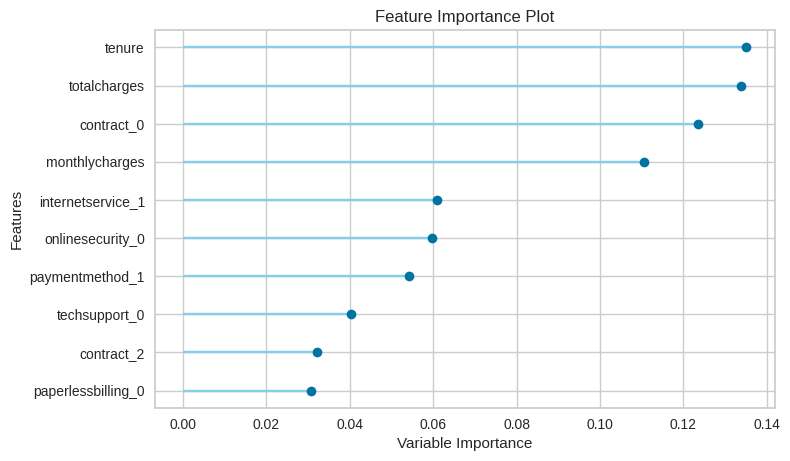

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [ ]:
catb = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8051,0.8404,0.7173,0.7959,0.7982,0.4623,0.4664
1,0.8228,0.8651,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8294,0.7025,0.7826,0.7856,0.4293,0.4327
3,0.8299,0.8799,0.7406,0.8221,0.8217,0.5222,0.5307
4,0.8071,0.8514,0.7136,0.7970,0.7989,0.4594,0.4651
5,0.8249,0.8555,0.7479,0.8183,0.8201,0.5207,0.5235
6,0.8096,0.8649,0.7376,0.8047,0.8067,0.4893,0.4902
7,0.8020,0.8548,0.7165,0.7936,0.7962,0.4563,0.4592
8,0.8274,0.8660,0.7592,0.8227,0.8244,0.5354,0.5367
9,0.8198,0.8416,0.7508,0.8152,0.8170,0.5165,0.5175


In [ ]:
tuned_catb = tune_model(catb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8177,0.8445,0.7290,0.8089,0.8101,0.4921,0.4981
1,0.8228,0.8693,0.7105,0.8148,0.8082,0.4780,0.4984
2,0.7924,0.8402,0.7088,0.7844,0.7873,0.4368,0.4388
3,0.8376,0.8794,0.7552,0.8308,0.8308,0.5482,0.5549
4,0.8046,0.8464,0.7214,0.7967,0.7993,0.4651,0.4677
5,0.8274,0.8530,0.7496,0.8207,0.8224,0.5260,0.5293
6,0.8122,0.8697,0.7266,0.8037,0.8059,0.4807,0.4846
7,0.8274,0.8569,0.7592,0.8227,0.8244,0.5354,0.5367
8,0.8299,0.8621,0.7481,0.8227,0.8239,0.5283,0.5330
9,0.7995,0.8398,0.7244,0.7942,0.7964,0.4620,0.4629


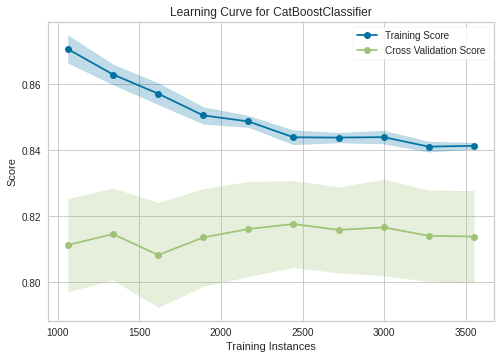

In [ ]:
plot_model(estimator = tuned_catb, plot = 'learning')

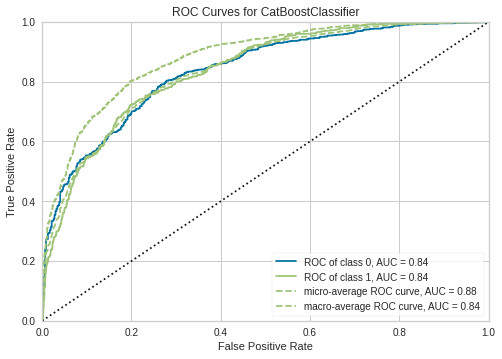

In [ ]:
plot_model(estimator = tuned_catb, plot = 'auc')

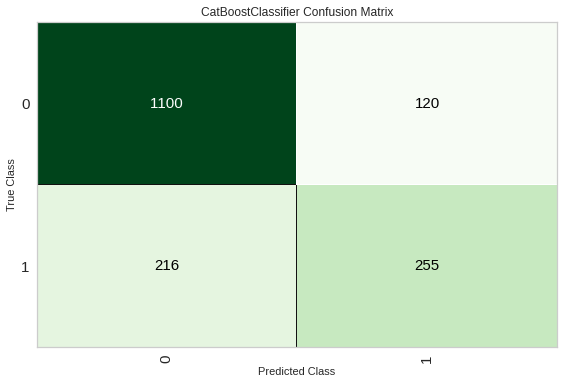

In [ ]:
plot_model(estimator = tuned_catb, plot = 'confusion_matrix')

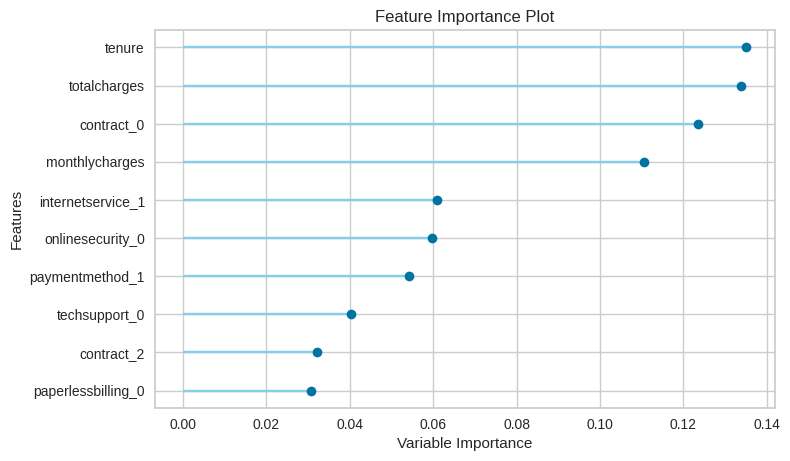

In [ ]:
plot_model(estimator = tuned_gbc, plot = 'feature')